In [1]:
%run ./dataframe.ipynb
df

993


,Data Input Year,State,Country,Language,IPEDS Race Description,Athletic Code,Team Gender,Team Name,HYR,Entering Term,...,Semester GPI-2nd Sem,Semester GPI-3rd Sem,Semester GPI-4th Sem,Semester GPI-5th Sem,Semester GPI-6th Sem,Semester GPI-7th Sem,Semester GPI-8th Sem,Semester GPI-9th Sem,Semester GPI-10th Sem,Semester GPI-11th Sem
0,2022,NaN,Canada,English,Non-Resident Alien,HC,M,MEN'S ICE HOCKEY,J20,Fall2020,...,0.00,2.85,0.00,2.90,0.00,0.00,0.0,0.0,0.0,0.0
1,2021,CT,USA,English,African American or Black,SC,M,MEN'S SOCCER,S17,Fall2017,...,3.18,3.35,3.33,3.68,3.60,3.85,3.9,0.0,0.0,0.0
2,2023,CA,USA,English,White,MC,M,MEN'S ROWING,S20,Fall2020,...,3.60,3.50,3.40,3.58,3.68,0.00,0.0,0.0,0.0,0.0
3,2023,NaN,Italy,Non-English,Non-Resident Alien,SC,M,MEN'S SOCCER,S19,Fall2019,...,3.93,3.75,4.00,3.85,4.00,3.75,4.0,0.0,0.0,0.0
4,2023,NaN,Germany,Non-English,Non-Resident Alien,MC,M,MEN'S ROWING,S21,Fall2021,...,3.94,3.48,3.34,0.00,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,2023,NJ,USA,English,African American or Black,WS,W,WOMEN'S SOCCER,S22,Fall2022,...,3.40,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
989,2023,NJ,USA,English,Two or More Races Reported,CW,W,CROSS COUNTRY (WOMEN),S22,Fall2022,...,4.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
990,2023,MI,USA,English,White,WH,W,WOMEN'S HOCKEY,S22,Fall2022,...,3.10,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
991,2023,NaN,China,Non-English,Non-Resident Alien,TW,W,WOMEN'S TENNIS,S22,Fall2022,...,2.88,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0


[array([1.7417, 2.0667, 2.3235, 2.3509, 2.373 , 2.4025, 2.4051, 2.3893]), array([2.5572, 2.6976, 2.7447, 2.8138, 2.8312, 2.8508, 2.8684, 2.8728]), array([2.8202, 2.9018, 2.9418, 2.9715, 2.9849, 3.0024, 3.016 , 3.0304]), array([2.9965, 3.074 , 3.0932, 3.1088, 3.1155, 3.1403, 3.1578, 3.1726]), array([3.1485, 3.2072, 3.226 , 3.2293, 3.2411, 3.2581, 3.2678, 3.28  ]), array([3.2931, 3.3284, 3.3348, 3.3431, 3.3555, 3.3716, 3.377 , 3.3809]), array([3.4336, 3.4426, 3.4427, 3.4495, 3.4662, 3.4809, 3.4856, 3.4861]), array([3.5708, 3.579 , 3.5598, 3.57  , 3.5822, 3.5884, 3.5939, 3.5983]), array([3.7342, 3.7386, 3.727 , 3.7165, 3.7194, 3.7266, 3.7307, 3.7326]), array([3.92866667, 3.90988889, 3.90433333, 3.90411111, 3.90655556,
       3.90811111, 3.91044444, 3.91055556])]


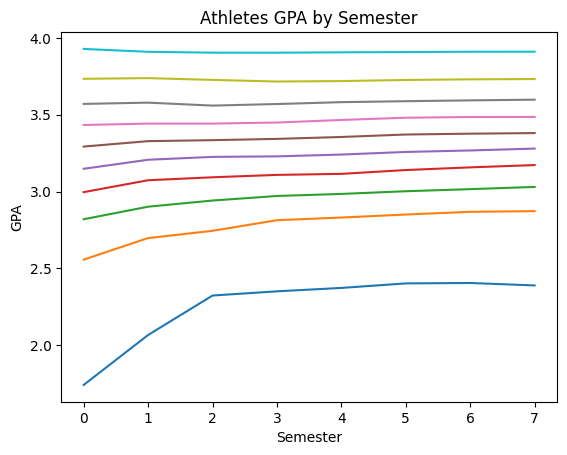

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import copy
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import median
import numpy as np

df_copy = copy.deepcopy(df)
df_copy = df_copy.dropna(subset = ['Cumulative GPA-1st Sem', 'Cumulative GPA-2nd Sem', 'Cumulative GPA-3rd Sem', 'Cumulative GPA-4th Sem', 'Cumulative GPA-5th Sem', 'Cumulative GPA-6th Sem', 'Cumulative GPA-7th Sem', 'Last Cumulative BU GPA']) 
df_pd_copy = df_copy[['Cumulative GPA-1st Sem', 'Cumulative GPA-2nd Sem', 'Cumulative GPA-3rd Sem', 'Cumulative GPA-4th Sem', 'Cumulative GPA-5th Sem', 'Cumulative GPA-6th Sem', 'Cumulative GPA-7th Sem', 'Last Cumulative BU GPA']].values
df_pd = np.sort(df_pd_copy, axis = 0)


track = {}
count = 1
for x in range(len(df_pd)):
    if x != 0 and x % 100 == 0:
        count += 1
    if count not in track:
        track[count] = []
    track[count].append(df_pd[x])

lines = []
for key in track.keys():
    gpa = []
    for point in track[key]:
        gpa.append(point)
    lines.append((sum(gpa)/len(gpa)))

new_lines = np.transpose(lines)
print(lines)
plt.title("Athletes GPA by Semester")
plt.xlabel("Semester")
plt.ylabel("GPA")
plt.plot(new_lines)